In [181]:
!pip install scikit-learn
!pip install nltk

In [182]:
#array
import numpy as np
#data manipulation,cleaning analyzing
import pandas as pd
#graph
import matplotlib.pyplot as plt
 #regular expression(for matching data from scrap)
import re
#for breaking into sentence or words
from keras.preprocessing.text import Tokenizer
#array length same size
from keras.preprocessing.sequence import pad_sequences
#data splitting in training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, f1_score

In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
data =pd.read_csv('/content/drive/MyDrive/asim.csv',encoding='utf-8')

In [202]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
data.head(60000)


,News,Headings
0,اسلام آباد میں مقیم سرکاری ادارے میں کام کرنے ...,پاکستان
1,تاہم جب جولائی میں ان کا جون کے مہینے کا بل آی...,پاکستان
2,عامر نے اس سلسلے میں اسلام آباد الیکٹرک سپلائی...,پاکستان
3,پنجاب کے ضلع میانوالی کے ایک گاؤں میں رہائش پذ...,پاکستان
4,اس سلسلے میں انھوں نے میانوالی شہر میں فیصل آب...,پاکستان
...,...,...
11604,ہنگری سے دور دراز سلوواکیہ کے ساتھ شمالی سرحد...,ورلڈ
11605,یہ وہ جگہ تھی، جہاں 12 تارکین وطن کو لے کر جان...,ورلڈ
11606,اس میں سات تارکین وطن زخمی ہوئے۔ یہ واقع گذشتہ...,ورلڈ
11607,آسٹریا کی سرحد کے اس پار پولیس کے پاس صرف مشرق...,ورلڈ


In [187]:
from tkinter.constants import S
from nltk.corpus import stopwords
stop_words = ['رہا', 'رہی', 'ہیں', 'گی', 'ہو', 'ہوئی', 'گے', 'ہیں', 'ہوں', 'گا', 'تھا', 'ہے', 'ہوا', 'تھی', 'تھے', 'تھا۔', 'ہے؟', 'ہے۔', 'ہیں۔', 'گا۔', 'ہو۔', 'گا۔', 'ہیں۔','گئے','گیا','تھی۔','گئے۔','گیا۔']
data['News'] = data['News'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
data.head(50000)


,News,Headings
0,انھوں نے کہا یہ سارا ڈیٹا موجود ہوتا اور اس کا...,پاکستان
1,’پاکستان میں عدلیہ کے افسران کو بھی لا کر ایک ...,پاکستان
2,اس میں ایک مسئلہ یہ بھی آتا کہ عدلیہ جب خود ان...,پاکستان
3,‘,پاکستان
4,اُن کا مزید کہنا کہ ’صوبوں کے پاس وفاق کی نسبت...,پاکستان
...,...,...
3384,تہمینہ کہتی کہ ’اس نے مجھے ہمیشہ خوفزدہ رکھا، ...,ورلڈ
3385,سیکس ورک کی وجہ سے تہمینہ کی صحت بگڑ گئی اور ا...,ورلڈ
3386,تہمینہ اور افروزہ جیسی لڑکیوں کو بعض اوقات ایک...,ورلڈ
3387,بی بی سی نے سمگلروں اور دلالوں کی ڈائریوں کے ص...,ورلڈ


In [188]:
data.dropna()

,News,Headings
0,انھوں نے کہا یہ سارا ڈیٹا موجود ہوتا اور اس کا...,پاکستان
1,’پاکستان میں عدلیہ کے افسران کو بھی لا کر ایک ...,پاکستان
2,اس میں ایک مسئلہ یہ بھی آتا کہ عدلیہ جب خود ان...,پاکستان
3,‘,پاکستان
4,اُن کا مزید کہنا کہ ’صوبوں کے پاس وفاق کی نسبت...,پاکستان
...,...,...
3383,عزیزہ شیر کی گرفتاری کے بعد تہمینہ کو کچھ سکون...,ورلڈ
3384,تہمینہ کہتی کہ ’اس نے مجھے ہمیشہ خوفزدہ رکھا، ...,ورلڈ
3385,سیکس ورک کی وجہ سے تہمینہ کی صحت بگڑ گئی اور ا...,ورلڈ
3386,تہمینہ اور افروزہ جیسی لڑکیوں کو بعض اوقات ایک...,ورلڈ


In [189]:
data=data.dropna()

In [190]:
data.head()

,News,Headings
0,انھوں نے کہا یہ سارا ڈیٹا موجود ہوتا اور اس کا...,پاکستان
1,’پاکستان میں عدلیہ کے افسران کو بھی لا کر ایک ...,پاکستان
2,اس میں ایک مسئلہ یہ بھی آتا کہ عدلیہ جب خود ان...,پاکستان
3,‘,پاکستان
4,اُن کا مزید کہنا کہ ’صوبوں کے پاس وفاق کی نسبت...,پاکستان


In [191]:
import re
pattern = r'[a-zA-Z0-9!?(,)،’‘۔؟]'
data['News']=data['News'].apply (lambda x: re.sub(pattern,'',x))
data.head(20)
#succesful remove of symbols

<ipython-input-191-55c87789f2c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['News']=data['News'].apply (lambda x: re.sub(pattern,'',x))


,News,Headings
0,انھوں نے کہا یہ سارا ڈیٹا موجود ہوتا اور اس کا...,پاکستان
1,پاکستان میں عدلیہ کے افسران کو بھی لا کر ایک ت...,پاکستان
2,اس میں ایک مسئلہ یہ بھی آتا کہ عدلیہ جب خود ان...,پاکستان
3,,پاکستان
4,اُن کا مزید کہنا کہ صوبوں کے پاس وفاق کی نسبت ...,پاکستان
5,,پاکستان
6,ہنزہ کی اس خوبصورت وادی کی خواتین کس قدر محنت ...,پاکستان
7,عتیق احمد ایک انڈین گینگسٹر اور سیاست دان,پاکستان
8,انھوں نے سماج وادی پارٹی سے انڈین پارلیمنٹ اور...,پاکستان
9,احمد کے خلاف سے زائد فوجداری مقدمات درج اور ا...,پاکستان


In [192]:
categories =data['Headings'].unique()
for category in categories:
        print(category)


پاکستان
کھیل
سائنس
ورلڈ


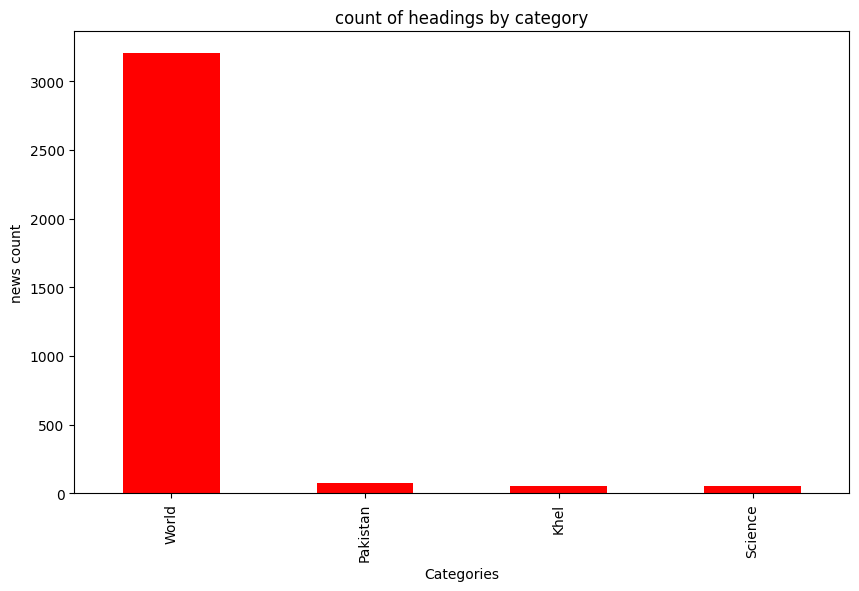

In [193]:
import matplotlib.pyplot as plt
catm= {'پاکستان':'Pakistan','کھیل':'Khel','سائنس':'Science','ورلڈ':'World'}
category_counts=data['Headings'].map(catm).value_counts()
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar',color='red')
plt.xlabel('Categories')
plt.ylabel('news count')
plt.title('count of headings by category')
plt.show()

In [194]:
data.head()

,News,Headings
0,انھوں نے کہا یہ سارا ڈیٹا موجود ہوتا اور اس کا...,پاکستان
1,پاکستان میں عدلیہ کے افسران کو بھی لا کر ایک ت...,پاکستان
2,اس میں ایک مسئلہ یہ بھی آتا کہ عدلیہ جب خود ان...,پاکستان
3,,پاکستان
4,اُن کا مزید کہنا کہ صوبوں کے پاس وفاق کی نسبت ...,پاکستان


In [195]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [196]:
tfidf_vectorizer =TfidfVectorizer()
x_tfidf=tfidf_vectorizer.fit_transform(data['News'])
y=data['Headings']

In [197]:
print(x_tfidf)

  (0, 4060)	0.24411496404951005
  (0, 2222)	0.21230336500508895
  (0, 8457)	0.13670813864473663
  (0, 7979)	0.2317348339391741
  (0, 8040)	0.13768965615902162
  (0, 5348)	0.2312945746332809
  (0, 2227)	0.35106521436396027
  (0, 7912)	0.10130259778370235
  (0, 356)	0.10141850509601655
  (0, 833)	0.08870664997389205
  (0, 8995)	0.2458132401383775
  (0, 6038)	0.22667678153406162
  (0, 7895)	0.3924240721769743
  (0, 3628)	0.4511901659013318
  (0, 9223)	0.2570745969337912
  (0, 8432)	0.1605338353408076
  (0, 6576)	0.09174977287076629
  (0, 815)	0.17080280855635674
  (1, 5499)	0.3842602430497492
  (1, 6757)	0.13160392887528058
  (1, 5341)	0.17465196726167248
  (1, 1917)	0.32299268310151197
  (1, 1151)	0.11422698541642479
  (1, 5071)	0.37711596585850005
  (1, 1733)	0.2790025883542044
  :	:
  (3386, 2960)	0.26427662078730985
  (3386, 4401)	0.26427662078730985
  (3386, 7508)	0.26427662078730985
  (3386, 4362)	0.26427662078730985
  (3386, 8197)	0.25480794203903423
  (3386, 3132)	0.23638892109252

In [198]:
X_train, X_test, y_train,y_test=train_test_split(x_tfidf,y,test_size=0.4,random_state=42)
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [199]:
y_pred=classifier.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       سائنس       0.00      0.00      0.00        22
        ورلڈ       0.95      1.00      0.97      1285
     پاکستان       0.00      0.00      0.00        31
        کھیل       0.00      0.00      0.00        17

    accuracy                           0.95      1355
   macro avg       0.24      0.25      0.24      1355
weighted avg       0.90      0.95      0.92      1355



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
